# Введение в искусственные нейронные сети
# Урок 2. Keras

## Содержание методического пособия:


<ol>
<li>Способы создания нейросетей</li>
<li>Что такое Keras</li>
<li>Основы синтаксиса</li>
<li>Простая нейросеть на Keras</li>
</ol>

## Способы создания нейросетей

Нейросети это математические модели. Программирую на любом языке можно решать задачи связанные с математикой. Однако встает вопрос какой язык подойдет для этого больше? Не считая учебных нейросетей, нейросети как правило работают с большим количеством данных. Поэтому, чтобы обучение нейросетей происходило с приемлимой скоростью нужно использовать быстрый язык. Например Си. Но так как язык Си это язык с низким уровнем абстракции то программировать и модифицировать на нем нейросети было бы крайне затруднительно. 

Хорошо может подойти для этих целей язык Python. Так как он с одной стороны имеет высокий уровень абстракции с другой стороны операции с массивами данных могут сделать его библиотеки написанные на Си. Таким способом мы пользовались на первых 2 уроках. Однако если писать нейросети таким образом то будет много повторяющегося кода поскольку архитектуры нейросетей остаются одинаковыми и зачастую у них только меняются параметры. Кроме этого нам может понадобиться хорошо знать архитектуры самых разных нейронных сетей чтобы реализовать их вручную. Работа таким образом затруднительна для людей не имеющих достаточной подготовки, а для имеющих может быть нааборот рутиной.

Существуют фреймворки для созданий нейронных сетей. Они являются, пожалуй основным рабочим способом создания нейронных сетей. Вот их неполный перечень:

1. TensorFlow
2. PyTorch
3. Keras
4. Microsoft Cognitive Toolkit (CNTK)
5. Caffe
6. Apache MXNet

Упрощение создания нейронных сетей не заканчивается на этих фрейворках. Существуют инструменты которые позволяют создавать нейронные сети без навыков программирования, строя нейросети графически. Примеры: Neural Designer, Deep Learning Studio.

Но и на этом не заканчиваются способы создания нейросетей. Существуют инструменты самостоятельно создающие нейронные сети. Это так называемые AutoML инструменты. Вот примеры популярных из них:
1. MLBox
2. TPOT
3. Autokeras

Как вы возможно заметили что все эти инструменты отранжированы походы изложения в порядке возрастания уровня абстракции. Соответсвенно говоря о плюсах минусах того или иного инструмента мы должны понимать в принципе плюсы минусы повышения уровня абстракции. Чем он выше тем меньше производительность и тем меньше его гибкость и набоорот.

Как уже было сказано наиболее востребованных в рабочих целях является тот уровень абстракции, который дают фреймворки. Будем изучать дальше и пользовать ими. Остается сделать выбор среди них. Самый популярный фреймворк для создания нейросетей TensorFlow. Самый популярный для обучения - Keras. На этом уроке мы изучим с вами Keras, а на следующим TensorFlow. Также стоит отметить, что эти фреймворки взаимосвязаны - Keras как правило работает поверх TensorFlow, а сам TensorFlow позволяет пользовать средствами Keras при необходимости.


## Что такое Keras

Keras появился относительно недавно - в 2015 г. Но за это время стал одним из самых популярных фреймоворков для создания нейросетей и фактически стандартом для использования его начинающими.

В чем причина его популярности? Keras позволяет создовать на высоком уровне абстракции. Т.е. на не нужно вручную реализовать с помощью математикаподобного кода те или иные элементы нейронной сети. Мы можем оперировать слоями, количеством нейронов в них, выбором функции активации и т.д. В тоже время keras содержит инструментарий для всего того, что может понадобиться для работы - например ряд встроенных датасетов, возможность обрабатывать изображения.

В техническом плане Keras это оболочка над инструментами меньшей степени абстракции. На выбор он может работать поверх TensorFlow, Microsoft Cognitive Toolkit, R, Theano, PlaidML.

Keras пользуется также на соревнованиях Kaggle.

Однако стоит отметить, что в реальных проектах чаще используется TensorFlow, который мы будем изучать в след. уроках.

Keras как и любой высокобастрактный инструмент имеет изъяны в качестве меньшей гибкостью и производительснотью чем тот же tensorflow.

Стоит также отметить, что Google официально поддерживает Keras, его автор François Chollet, является сотрудником Google. TensorFlow сам в свою очередь позволяет использовать возможности Keras, т.е. в нем заложена возможность переходить на более высокой уровень абстракции.

В данном уроке мы с вами рассмотрим пример обучения нейронной сети с помощью Keras. Но прежде давайте посмотрим на основы синтаксиса Keras и стандартные задачи, которые нужно выполнить при обучении нейронной сети.

## Основы синтаксиса

**Установка и работа с данными**

Для начала необходимо установить keras. Надо полагать вы хорошо знакомы с командой pip.

sudo python3 pip install keras

Давайте попробуем получить датасет mnist и проанализировать его содержимое.
Это еще не будет синтаксис Keras, но это часто встречающаяся задача. Не обращайте внимание на предупреждения от TensorFlow. Их часто бывает много и их можно подавить при необходимости.

    import numpy as np
    import mnist
    import keras

    # The first time you run this might be a bit slow, since the
    # mnist package has to download and cache the data.
    train_images = mnist.train_images()
    train_labels = mnist.train_labels()

    print(train_images.shape) # (60000, 28, 28)
    print(train_labels.shape) # (60000,)

Что в данном случае мы смогли с вами узнать? Что тренировочный датасет mnist состоит из 60000 изображений 28 на 28 пикселей. Такие небольшие датасеты с маленькими изображениями встретятся вам и в других учебных датасетах.

Что нам нужно делать теперь? Если датасет не имеет разделения на тренировочный и тестовый то поделить их. В нашем случае наш тренировочный датасет состоит из 60 000 изображений и тестовый из 10 000 и они поделены по умолчанию.

Нам теперь нужно конверитировать значения пикселей из вида от 1 до 255 в набор значений от -0.5 до 0.5.



In [1]:
import numpy as np
#import mnist
#import tensorflow as tf
#import tf.kears as keras
import keras
from keras.datasets import mnist, boston_housing, fashion_mnist  # наборы для работы

#train_images = mnist.train_images()
#train_labels = mnist.train_labels()
#test_images = mnist.test_images()
#test_labels = mnist.test_labels()

(train_imagesi,train_labels),(test_imagesi,testn_labels)=mnist.load_data()

# Normalize the images.
train_imagesi = (train_imagesi / 127) - 1
test_imagesi = (test_imagesi / 127) - 1

# Flatten the images.
train_images = train_imagesi.reshape((-1, 784))
test_images = test_imagesi.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


In [2]:
n=1
train_imagesi[n,:,:].shape

(28, 28)

In [3]:
keras.backend.backend()

'tensorflow'

In [4]:
import matplotlib.pyplot as plt

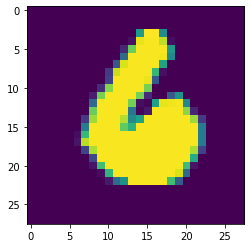

6


In [5]:
n = 2005
plt.imshow(train_imagesi[n,:,:])
plt.show()
print(train_labels[n])

In [6]:
train_labels[:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

In [7]:
train_images[202,150:160]

array([-1.        , -1.        , -1.        , -1.        , -1.        ,
       -0.90551181, -0.80314961, -0.80314961, -0.80314961, -0.80314961])

**Создание модели**

После первичной подготовки данных дальше как правило следует создание модели нейронной сети, которая будет учиться на этих данных.

Ниже типичный код учебной нейросети - 

    # define the keras model
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

Давайте разберемся с теми командами, которые нам встетились в этом коде.

Sequential - позволяет создать нейросети где слои имеют форму стека. Сигнал в них передается от одного слоя к другому. В противовес этой разновидности есть нейросети где сигнал может не сразу передаваться в следующий слой а попадать в цикл. Такие нейросети мы разберем в следующих уроках.

Dense - позволяет каждому нейронну быть связанному с другим нейронном. В противовес этом может быть необходимость не делать так много связей. Неполносвязнные архитектуры мы также разберем на этом курсе, они основа компьютерного зрения.

Цифры 12, 8, 1 обозначают количество нейронов в каждом конкретном слое

Activation - позволяет определить формулу по которой будет активироваться нейрон.

**Компиляция модели**

На этапе компиляции модель с заданными параметрами ранее создается. Вот типичный учебный пример:

    
    # создание keras модели
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Однако на этой стадии мы должны сделать еще некоторые настройки нейронной сети. Разберем команды из кода выше.

loss - позволяет задать формулы по которой будет определяться степень ошибки нейронной сети.

optimizer - позволяет задать алгоритм, который будет осуществлять изменения весов по всей нейронной сети (backpropagation)

metrics - позволяет опредилить кретирии по которым будет оцениваться степень обученности нейросети.
    
    

**Передача данных для обучения нейросети**

После того как нейросеть создана можно передавать ей данные для обучения. Ниже типичный пример кода для этого.


    # передача обучающего датасета keras модели
    model.fit(X, y, epochs=150, batch_size=10, verbose=0)

Разберем команды из этого примера.
X, y - содержат все обучающие данные
epochs - определяет сколько раз через нейросеть должен пройти весь набор данных
bath_size - определяет количество обучающих примеров передающихся нейросети на каждой итерации обучения.
verbose - позволяет определять информацию, котору вы видете во время обучения нейронной сети.

**Оценка обученности нейронной сети**

Следующей стадией может быть проверка обученности нейронной сети. Команда Keras для этих целей - 

    results = model.evaluate(x_test, y_test, batch_size=128)
    
В данном случае мы просто указываем какую модель на каких данных мы хотим проверить

**Запуск нейронной сети для выполнения работы**

На этой стадии мы можем попробовать запустить нейронную сеть на данных которые мы хотели бы чтобы она оценила. Осуществить распознования объекта на фотографии например.
Вот код для этих целей - 

    predictions = model.predict(x_test[:3])
    
В качестве аргумента здесь указывается массив даныхх содержащих, например фотографию в виде массива чисел.    
    

Мы с вами рассмотрели основные стадии процесса обучения нейросети и команды Keras, для этого. Безусловно здесь приведен далеко неполный перечень возможностей Keras. У Keras есть также возможность сохранять созданную нейросеть, запускать уже имеющиюся, различные средства для создания нейросетей разных архитектур и другое. С чем то из арсенала Keras мы с вами познакомимся по ходу курса, а с остальным вы можете познакомиться на сайте Keras в разделе документация.

## Простая нейросеть на Keras

Давайте попрубуем сделать нейросеть на Keras использую полученные выше знания. Попробуем обучить нейросеть различать рукописные цифры.

In [8]:
# Код нейронной сети в Keras!
###############################
import numpy as np
#import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical



Размер набора входных данных для обучения 

In [9]:
train_images.shape,test_images.shape

((60000, 784), (10000, 784))

Собираем сеть по слоям через .add()

In [10]:
model1 = Sequential(name='my_model')
model1.add(Dense(    128, activation='relu', input_shape=(784,)))  
# входной слой + поносвязный слой из 128 нейронов с активацией ReLU
for k in range(2):
  model1.add(Dense(  10+(10-k)*10, activation='tanh')) 
  # Скрытый слой k из 10+(10-k)*10 нейронов с активацией tanh

model1.add(Dense(10, activation='softmax')) 
# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax

In [11]:
#keras.losses.SparseCategoricalCrossentropy().
#keras.losses.categorical_crossentropy()
# keras.metrics.accuracy

Компилируем сеть с оптимизатором , функцией потерь и метрикой:

In [12]:
model1.compile(
  optimizer='adam', # оптимизатор
  loss=keras.losses.CategoricalCrossentropy(), # функция потерь
  metrics=['accuracy'], # метрика
) 

Оптимизаторы:
* SGD() (с или без моментум)
* RMSprop()
* Adam()
* Adagrad()
…

Функции потерь:
* CategoricalCrossentropy()
* SparseCategoricalCrossentropy()
* BinaryCrossentropy()
* MeanSquaredError()
* KLDivergence()
* CosineSimilarity()
…

Метрики:
* CategoricalAccuracy()
* SparseCategoricalAccuracy()
* BinaryAccuracy()
* AUC()
* Precision()
* Recall()
…

ПОсмотрим из чего она состоит:

In [13]:
model1.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 110)               14190     
                                                                 
 dense_2 (Dense)             (None, 100)               11100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 126,780
Trainable params: 126,780
Non-trainable params: 0
_________________________________________________________________


126 780 параметров в сети. Все будем обучать.

Как считать параметры слоя: (число входов нейрона +1)*число нейронов


Например, для 5 входов и 10 нейронов в слое - число настраиваемых параметров = (5+1)*10 = 60

Еще один способ создать линейную модель

In [14]:

# Build the model.
model = Sequential([
  Dense(128, activation='tanh', input_shape=(784,)),
  Dense(110, activation='tanh'), # Скрытый слой из 110 нейронов с активацией tanh
  Dense(100, activation='tanh'), # Скрытый слой k из 100 нейронов с активацией tanh
  Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
])

# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 110)               14190     
                                                                 
 dense_6 (Dense)             (None, 100)               11100     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 126,780
Trainable params: 126,780
Non-trainable params: 0
_________________________________________________________________


Можно подсмотреть как наша модель описана после ее создания

In [16]:
model.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'name': 'dense_4_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'tanh',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_4',
    'trainable': True,
    'units': 128,
    'use_bias': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'tanh',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initiali

Превратим выходы в векторые (OHE в keras - from keras.utils import to_categorical)

In [17]:
train_labels[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [20]:
y_t = to_categorical( train_labels)
y_tt = to_categorical(testn_labels)

In [21]:
y_t[:3,:]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [22]:
train_labels[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

Посмотрим на реакции модели до обучения - уже можно:)

In [23]:
y_pred = model.predict(test_images[:5,:])

In [24]:
y_pred[0,:]

array([0.03618059, 0.09345043, 0.14654428, 0.07426222, 0.09837215,
       0.19263855, 0.16458498, 0.04454132, 0.05883563, 0.0905899 ],
      dtype=float32)

In [25]:
y_class = np.argmax(y_pred, axis=1)
print(y_class) # [7, 2, 1, 0, 4]

[5 5 5 5 3]


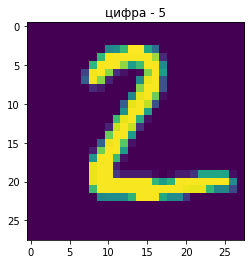

In [26]:
n = 1
plt.imshow(test_imagesi[n,:,:])
plt.title('цифра - '+str(y_class[n]))
plt.show()

Сделаем цикл тренировки модели

In [28]:

# Train the model.
model1.fit(    
  train_images[:,:],

  y_t[:,:],
  epochs=2,
  batch_size=32, validation_split=0.2
)

# Evaluate the model.
model1.evaluate( 
  test_images,
  y_tt
)

# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(testn_labels[:5]) # [7, 2, 1, 0, 4]

Epoch 1/2
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1309 - accuracy: 0.9595 - val_loss: 0.1315 - val_accuracy: 0.9596
Epoch 2/2
313/313 [==============================] - 2s 7ms/step - loss: 0.1461 - accuracy: 0.9545
[5 5 5 5 3]
[7 2 1 0 4]


И можем еще один добавить (продолжаем от предществующего состояния)

In [29]:
model.fit(
  train_images,
  y_t,
  epochs=15,
  batch_size=1024, validation_split=0.2
)

Epoch 1/15
47/47 [==============================] - 1s 12ms/step - loss: 0.8239 - accuracy: 0.7735 - val_loss: 0.3313 - val_accuracy: 0.9042
Epoch 2/15
47/47 [==============================] - 0s 8ms/step - loss: 0.2967 - accuracy: 0.9119 - val_loss: 0.2374 - val_accuracy: 0.9312
Epoch 3/15
47/47 [==============================] - 0s 8ms/step - loss: 0.2246 - accuracy: 0.9333 - val_loss: 0.1987 - val_accuracy: 0.9438
Epoch 4/15
47/47 [==============================] - 0s 8ms/step - loss: 0.1815 - accuracy: 0.9466 - val_loss: 0.1653 - val_accuracy: 0.9517
Epoch 5/15
47/47 [==============================] - 0s 8ms/step - loss: 0.1481 - accuracy: 0.9562 - val_loss: 0.1484 - val_accuracy: 0.9575
Epoch 6/15
47/47 [==============================] - 0s 8ms/step - loss: 0.1272 - accuracy: 0.9621 - val_loss: 0.1338 - val_accuracy: 0.9622
Epoch 7/15
47/47 [==============================] - 0s 8ms/step - loss: 0.1070 - accuracy: 0.9687 - val_loss: 0.1275 - val_accuracy: 0.9620
Epoch 8/15
47/47 [=

Сохраним модель на диск

In [30]:
# сохранить веса модели.
model.save_weights('model.h5')

# загрузить веса модели:
# model.load_weights('model.h5')


И еще тренируем (вторую модель)

In [31]:

# Train the model. Вернем результаты по потерям и метрикам для всех эпох в hh 
hh = model1.fit( 
  train_images,
  to_categorical(train_labels),
  epochs=15,
  batch_size=1024, validation_split=0.2
)

# Evaluate the model.
model1.evaluate(
  test_images,
  to_categorical(testn_labels)
)

# Predict on the first 5 test images.
predictions = model1.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(testn_labels[:5]) # [7, 2, 1, 0, 4]

Epoch 1/15
47/47 [==============================] - 1s 10ms/step - loss: 0.0724 - accuracy: 0.9776 - val_loss: 0.0903 - val_accuracy: 0.9735
Epoch 2/15
47/47 [==============================] - 0s 8ms/step - loss: 0.0519 - accuracy: 0.9845 - val_loss: 0.0857 - val_accuracy: 0.9752
Epoch 3/15
47/47 [==============================] - 0s 8ms/step - loss: 0.0478 - accuracy: 0.9856 - val_loss: 0.0849 - val_accuracy: 0.9753
Epoch 4/15
47/47 [==============================] - 0s 8ms/step - loss: 0.0450 - accuracy: 0.9869 - val_loss: 0.0834 - val_accuracy: 0.9753
Epoch 5/15
47/47 [==============================] - 0s 8ms/step - loss: 0.0431 - accuracy: 0.9874 - val_loss: 0.0832 - val_accuracy: 0.9753
Epoch 6/15
47/47 [==============================] - 0s 8ms/step - loss: 0.0414 - accuracy: 0.9879 - val_loss: 0.0827 - val_accuracy: 0.9750
Epoch 7/15
47/47 [==============================] - 0s 8ms/step - loss: 0.0397 - accuracy: 0.9887 - val_loss: 0.0821 - val_accuracy: 0.9757
Epoch 8/15
47/47 [=

Посмотрим на возвращаемый словарь hh.history (там результаты по эпохам для потерь и метрик по обучению и тестам)

In [32]:
hh.history

{'accuracy': [0.9775833487510681,
  0.9844791889190674,
  0.9855833053588867,
  0.9868958592414856,
  0.9873541593551636,
  0.9878749847412109,
  0.9887083172798157,
  0.9891666769981384,
  0.9893749952316284,
  0.9897291660308838,
  0.9902708530426025,
  0.9906250238418579,
  0.9909166693687439,
  0.9913333058357239,
  0.9917500019073486],
 'loss': [0.07237476855516434,
  0.05186395347118378,
  0.047834593802690506,
  0.0450211726129055,
  0.04313776642084122,
  0.041434772312641144,
  0.0397363118827343,
  0.038427673280239105,
  0.03715698421001434,
  0.035897910594940186,
  0.03484627231955528,
  0.03374689072370529,
  0.03272787854075432,
  0.03165130317211151,
  0.030682673677802086],
 'val_accuracy': [0.9735000133514404,
  0.9751666784286499,
  0.9753333330154419,
  0.9752500057220459,
  0.9752500057220459,
  0.9750000238418579,
  0.9756666421890259,
  0.9758333563804626,
  0.9756666421890259,
  0.9758333563804626,
  0.9762499928474426,
  0.9760000109672546,
  0.9762499928474426

Покажем как выглядит кривая обучения

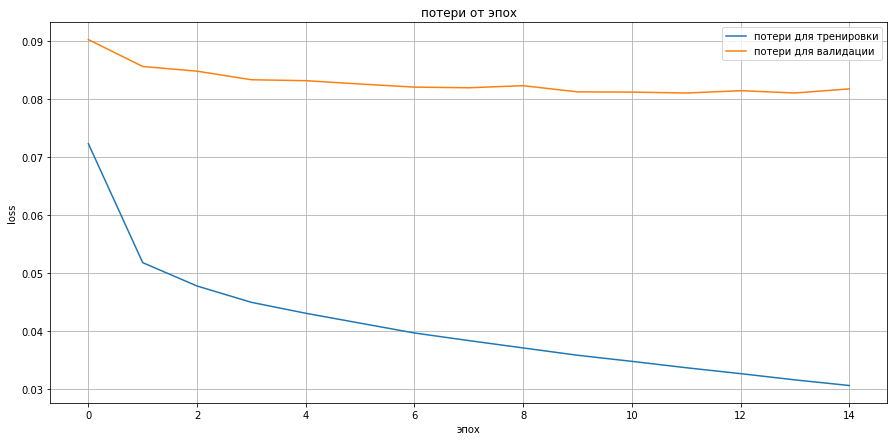

In [33]:
plt.figure(figsize=(15,7))
plt.plot(hh.history['loss'], label = 'потери для тренировки')
plt.plot(hh.history['val_loss'], label = 'потери для валидации')
plt.xlabel('эпох')
plt.ylabel('loss')
plt.legend()
plt.grid('On')
plt.title('потери от эпох')
plt.show()


In [34]:
hh.history

{'accuracy': [0.9775833487510681,
  0.9844791889190674,
  0.9855833053588867,
  0.9868958592414856,
  0.9873541593551636,
  0.9878749847412109,
  0.9887083172798157,
  0.9891666769981384,
  0.9893749952316284,
  0.9897291660308838,
  0.9902708530426025,
  0.9906250238418579,
  0.9909166693687439,
  0.9913333058357239,
  0.9917500019073486],
 'loss': [0.07237476855516434,
  0.05186395347118378,
  0.047834593802690506,
  0.0450211726129055,
  0.04313776642084122,
  0.041434772312641144,
  0.0397363118827343,
  0.038427673280239105,
  0.03715698421001434,
  0.035897910594940186,
  0.03484627231955528,
  0.03374689072370529,
  0.03272787854075432,
  0.03165130317211151,
  0.030682673677802086],
 'val_accuracy': [0.9735000133514404,
  0.9751666784286499,
  0.9753333330154419,
  0.9752500057220459,
  0.9752500057220459,
  0.9750000238418579,
  0.9756666421890259,
  0.9758333563804626,
  0.9756666421890259,
  0.9758333563804626,
  0.9762499928474426,
  0.9760000109672546,
  0.9762499928474426

Эксперимент с разными оптимизаторами для одной начальной модели:

  - создаем модель model
  - сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
  - создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры) 
  - загружаем веса modeli.load_weights('model.h5')
  - компилируем modeli с одним из оптимизаторов
  - вычисляем ошибку для modeli без обучения (т.к. все модели начинают с одной точки, то все ошибки должны быть одинаковые, но будем контролировать это и считаем каждый раз заново)
  - проводим обучение модели и пишем ошибки в истории hh
  - выводим ошибки для 0-го момента и каждой эпохи обучения по тестовой и валидационной частям данных



Оптимизаторы:
* SGD() (с или без моментум)
* RMSprop()
* Adam()
* Adagrad()
…


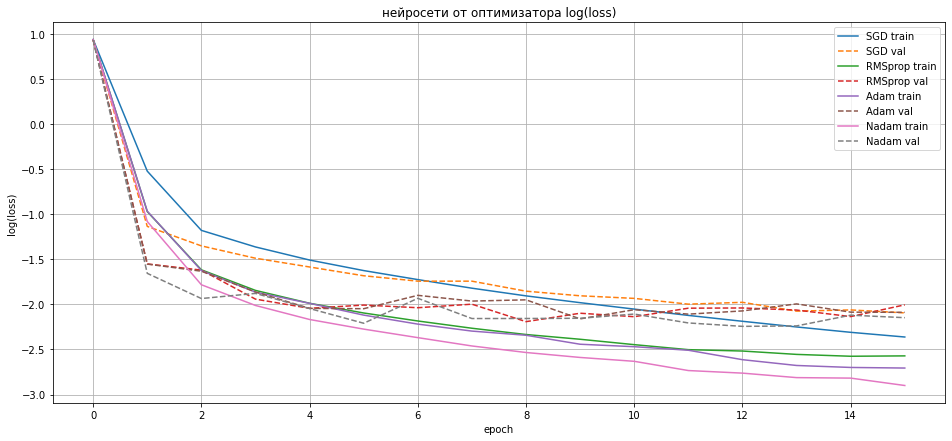

In [35]:
# создаем модель model
model = Sequential([
                      Dense( 64, activation='relu', input_shape=(784,)),
                      Dense(64, activation='tanh'),
                      Dense(10, activation='softmax'),
                      ])
# сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
model.save_weights('model.h5')

plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
# вектор для выводв результатов
epoch = np.arange(epochs+1)

# будем изменять оптимизаторы

#opt_list = [keras.optimizers.SGD( ),keras.optimizers.Adam( ),keras.optimizers.Nadam( )]
for i_optim in ['SGD','RMSProp','adam','NAdam']:
  # создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры)
  modeli = Sequential([
                      Dense(64, activation='relu', input_shape=(784,)),
                      Dense(64, activation='tanh'),
                      Dense(10, activation='softmax'),
                      ])
  # загружаем веса modeli.load_weights('model.h5')
  modeli.load_weights('model.h5')
  # компилируем modeli с одним из оптимизаторов
  modeli.compile(
      optimizer=i_optim,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
  # вычисляем ошибку для modeli без обучения
  hh0_tr = modeli.evaluate(  train_images[:48000,:], to_categorical(train_labels[:48000]),verbose = 0)
  hh0_val = modeli.evaluate(  train_images[48000:,:], to_categorical(train_labels[48000:]),verbose = 0)
  # проводим обучение модели 
  hh = modeli.fit(
                  train_images,
                  to_categorical(train_labels),
                  epochs=epochs,
                  batch_size=32, validation_split=0.2, verbose = 0
                  )
  # картинки
  plt.plot(epoch,np.log([hh0_tr[0]]+hh.history['loss']),'-',label = modeli.optimizer.get_config()['name']+' train')
  plt.plot(epoch,np.log([hh0_val[0]]+hh.history['val_loss']),'--',label = modeli.optimizer.get_config()['name']+' val')
plt.legend()
plt.grid('On')

plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()


In [36]:
 modeli.optimizer.get_config()

{'beta_1': 0.9,
 'beta_2': 0.999,
 'decay': 0.004,
 'epsilon': 1e-07,
 'learning_rate': 0.001,
 'name': 'Nadam'}

Посмотрим на результат предсказаний  (inference) для обученной модели (последняя в цикле)

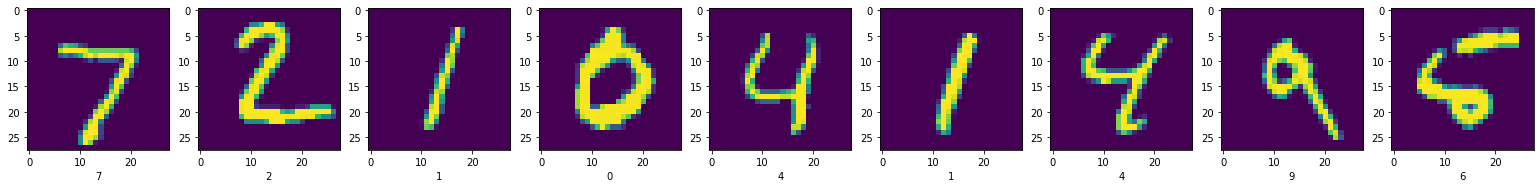

In [37]:
N = 9
y_pred = model1.predict(test_images[:N,:])
y_pred_class = np.argmax(y_pred,axis=1)
plt.figure(figsize =(3*N,5))
for i in range(N):
  plt.subplot(1,N,i+1)
  plt.imshow(test_images[i,:].reshape(28,28))
  plt.xlabel(str(y_pred_class[i]))
plt.show()  

In [38]:
y_pred_class

array([7, 2, 1, 0, 4, 1, 4, 9, 6])

Вариант синтаксиса:

In [39]:
y_predi = model1(test_images[:,:])
np.argmax(y_predi,axis=1)

array([7, 2, 1, ..., 4, 5, 6])

Где ошиблись?

In [41]:
yy = np.argmax(y_predi,axis=1)
np.where(testn_labels != yy)[0]

array([   8,  115,  247,  257,  259,  321,  340,  432,  445,  449,  495,
        582,  659,  684,  691,  720,  740,  760,  877,  900,  924,  938,
        951, 1014, 1032, 1044, 1107, 1112, 1182, 1226, 1232, 1247, 1260,
       1289, 1299, 1319, 1328, 1378, 1393, 1414, 1494, 1500, 1522, 1530,
       1549, 1601, 1609, 1671, 1681, 1709, 1737, 1754, 1790, 1850, 1878,
       1901, 1911, 1913, 1941, 1984, 2016, 2024, 2035, 2043, 2044, 2053,
       2070, 2098, 2109, 2118, 2130, 2135, 2182, 2185, 2272, 2293, 2371,
       2387, 2488, 2607, 2648, 2654, 2720, 2877, 2896, 2927, 2939, 2953,
       3023, 3030, 3060, 3117, 3206, 3289, 3333, 3422, 3451, 3475, 3503,
       3533, 3558, 3559, 3597, 3681, 3718, 3776, 3780, 3808, 3811, 3818,
       3838, 3853, 3862, 3893, 3906, 3941, 3946, 3976, 3985, 4065, 4075,
       4078, 4140, 4163, 4176, 4205, 4224, 4248, 4289, 4344, 4369, 4425,
       4497, 4521, 4536, 4571, 4601, 4615, 4635, 4690, 4731, 4807, 4814,
       4823, 4880, 4890, 4956, 4966, 4978, 5140, 51

## Практическое задание

Используем набор примеров fashion-MNIST

1.  Опишите - какой результата получен в нейросети в зависимости от:
  -  числа нейронов в слое(для 2-хслойной сети), 
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.
2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 

4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность). Сделайте вывод.

Загрузка Fashion_MNIST

In [45]:
from keras.datasets import fashion_mnist


In [46]:
(train_imagef,train_labelf),(test_imagef,test_labelf)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [47]:
ind=np.where(train_labelf==2)[0]
ind

array([    5,     7,    27, ..., 59977, 59981, 59993])

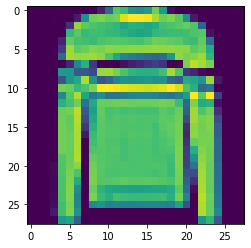

In [48]:
#plt.gray()
plt.imshow(train_imagef[5,:,:])
plt.show()

## Дополнительные материалы

<ol>
    <li> https://keras.io/</li>
    <li> https://playground.tensorflow.org/ - визуализация сетей 
</ol>

## Используемая литература 

Для подготовки данного методического пособия были использованы следующие ресурсы:
<ol>
    <li>https://keras.io/</li>
    <li>Шакла Н. — Машинное обучение и TensorFlow 2019</li>
    <li>Саймон Хайкин — Нейронные сети: полный курс</li>
    <li>Википедия</li>
    
</ol>